In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [2]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#นำเข้าข้อมูล

In [3]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
name={'customerID':'CustomerID', 'gender':'Gender', 'tenure':'Tenure'}

churn_df.rename(columns=name, inplace=True)

In [5]:
churn_df.drop(columns='CustomerID', inplace=True)
#ข้อมูลไม่จำเป็นต่อการวิเคราะห์

In [6]:
churn_df.replace('', np.nan, inplace=True)

In [7]:
' ' in churn_df.values 
#มีข้อมูลต้องคลีน

True

In [8]:
churn_df.replace(' ', np.nan, inplace=True)
#ทำให้เป็นค่าว่าง

In [9]:
churn_df.isnull().sum()
#เช็คค่าว่าง มี11ตัว

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
churn_df[churn_df['TotalCharges'].isnull()]
#rowที่เป็นค่าว่าง

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
1869/(5174+1869)
#churn rate 

0.2653698707936959

In [14]:
churn_df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
Q3_fiber = (churn_df.Gender =='Female') & (churn_df.SeniorCitizen == 1 ) & (churn_df.InternetService=='Fiber optic' )
churn_df[Q3_fiber][['Churn']].value_counts

<bound method DataFrame.value_counts of      Churn
30      No
50      No
53     Yes
75      No
99     Yes
...    ...
6987    No
6993   Yes
7008   Yes
7010   Yes
7023    No

[424 rows x 1 columns]>

In [17]:
Q4_PS = (churn_df.InternetService == 'Fiber optic') & (churn_df.PhoneService == 'No')
churn_df[Q4_PS][['InternetService','PhoneService']].value_counts()


Series([], dtype: int64)

In [18]:
Q4_fiber = (churn_df.Gender =='Female') & (churn_df.SeniorCitizen == 1 ) & (churn_df.InternetService=='DSL' )
churn_df[Q4_fiber][['Churn']].value_counts()

Churn
No       85
Yes      38
dtype: int64

In [19]:
#churnQ3_fiber=424
#churnQ4_DSL=123
print('ChurnQ3_fiber=',424/(5174+1869))
print('ChurnQ3_DSL=',123/(5174+1869))

ChurnQ3_fiber= 0.060201618628425387
ChurnQ3_DSL= 0.017464148800227175


In [20]:
0.060201618628425387-0.017464148800227175

0.04273746982819821

In [21]:
Q5 = churn_df.TechSupport=='No'
churn_df[Q5][['InternetService','TechSupport']].value_counts()
#Q5 Fiber optic and DSL

InternetService  TechSupport
Fiber optic      No             2230
DSL              No             1243
dtype: int64

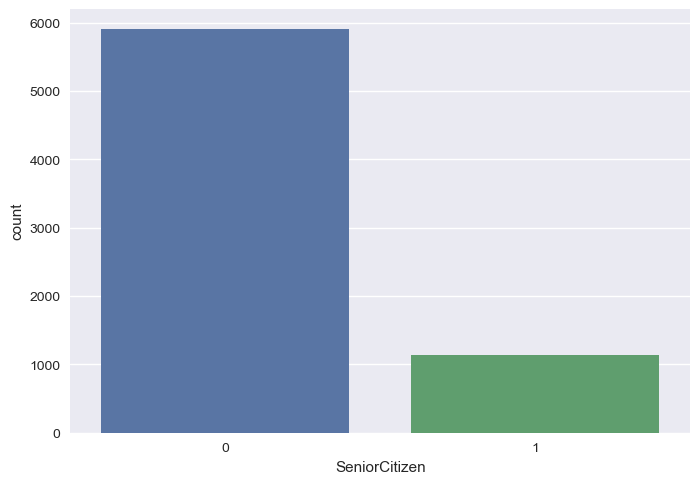

In [22]:
import seaborn as sns
ax = sns.countplot(x="SeniorCitizen", data=churn_df)

In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
Demographic_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']
Services_cols    = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
Account_cols_cat = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Account_cols_num = ['Tenure', 'MonthlyCharges', 'Churn']

In [24]:
list(enumerate(Services_cols[:10]))

[(0, 'PhoneService'),
 (1, 'MultipleLines'),
 (2, 'InternetService'),
 (3, 'OnlineSecurity'),
 (4, 'OnlineBackup'),
 (5, 'DeviceProtection'),
 (6, 'TechSupport'),
 (7, 'StreamingTV'),
 (8, 'StreamingMovies'),
 (9, 'Churn')]

In [25]:
churn_df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
# Phone Service
churn_df['PhoneService'] = np.where(churn_df['PhoneService']=='Yes', 1, 0)

# MultipleLines
churn_df['MultipleLines'] = np.where(churn_df['MultipleLines']=='Yes', 1, 0)

# Has Fiber optic 
churn_df['FiberOptic'] = np.where(churn_df['InternetService']=='Fiber optic', 1, 0)

# Has no services ( other than MultipleLines, StreamingTV,and StreamingMovies )
churn_df['NoServ'] = np.where((churn_df['OnlineSecurity'] != 'No') | (churn_df['OnlineBackup'] != 'No') |
                              (churn_df['DeviceProtection'] != 'No') | (churn_df['TechSupport'] != 'No'), 1, 0)

# StreamingTV,and StreamingMovies
churn_df['NoStream'] = np.where((churn_df['StreamingTV'] != 'No') | (churn_df['StreamingMovies'] != 'No'), 1, 0)
 
# number of services subscribed by each client
churn_df["SumOfIntServices"]=(churn_df.iloc[:, 6:12]=='Yes').sum(axis=1)

In [27]:
churn_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,FiberOptic,NoServ,NoStream,SumOfIntServices
0,Female,0,Yes,No,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,1
1,Male,0,No,No,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1,0,2
2,Male,0,No,No,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,0,2
3,Male,0,No,No,45,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0,3
4,Female,0,No,No,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,1,1,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,1,1,3
7039,Female,0,Yes,Yes,72,1,1,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1,1,1,2
7040,Female,0,Yes,Yes,11,0,0,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,1,0,1
7041,Male,1,Yes,No,4,1,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1,0,0,0


In [28]:
churn_df['MonthToMonth'] = np.where((churn_df['Contract'] == 'Month-to-month'), 1,0)
churn_df['PaperlessBilling'] = np.where((churn_df['PaperlessBilling'] == 'Yes'), 1,0)
churn_df['ElectronicCheck'] = np.where((churn_df['PaymentMethod'] == 'Electronic check'), 1,0)

In [29]:
churn_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,FiberOptic,NoServ,NoStream,SumOfIntServices,MonthToMonth,ElectronicCheck
0,Female,0,Yes,No,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,0,1,0,1,1,1
1,Male,0,No,No,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No,0,1,0,2,0,0
2,Male,0,No,No,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,0,1,0,2,1,0
3,Male,0,No,No,45,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,0,1,0,3,0,0
4,Female,0,No,No,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,1,1,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,No,0,1,1,3,0,0
7039,Female,0,Yes,Yes,72,1,1,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,No,1,1,1,2,0,0
7040,Female,0,Yes,Yes,11,0,0,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,No,0,1,0,1,1,1
7041,Male,1,Yes,No,4,1,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,Yes,1,0,0,0,1,0


In [30]:
churn_df.drop(columns=['Contract', 'PaymentMethod'], inplace=True)

In [31]:
churn_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,FiberOptic,NoServ,NoStream,SumOfIntServices,MonthToMonth,ElectronicCheck
0,Female,0,Yes,No,1,0,0,DSL,No,Yes,No,No,No,No,1,29.85,29.85,No,0,1,0,1,1,1
1,Male,0,No,No,34,1,0,DSL,Yes,No,Yes,No,No,No,0,56.95,1889.5,No,0,1,0,2,0,0
2,Male,0,No,No,2,1,0,DSL,Yes,Yes,No,No,No,No,1,53.85,108.15,Yes,0,1,0,2,1,0
3,Male,0,No,No,45,0,0,DSL,Yes,No,Yes,Yes,No,No,0,42.30,1840.75,No,0,1,0,3,0,0
4,Female,0,No,No,2,1,0,Fiber optic,No,No,No,No,No,No,1,70.70,151.65,Yes,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,1,1,DSL,Yes,No,Yes,Yes,Yes,Yes,1,84.80,1990.5,No,0,1,1,3,0,0
7039,Female,0,Yes,Yes,72,1,1,Fiber optic,No,Yes,Yes,No,Yes,Yes,1,103.20,7362.9,No,1,1,1,2,0,0
7040,Female,0,Yes,Yes,11,0,0,DSL,Yes,No,No,No,No,No,1,29.60,346.45,No,0,1,0,1,1,1
7041,Male,1,Yes,No,4,1,1,Fiber optic,No,No,No,No,No,No,1,74.40,306.6,Yes,1,0,0,0,1,0


In [32]:
churn_df.drop(columns=["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                       "TechSupport", "StreamingTV", "StreamingMovies"], inplace=True)

In [33]:
churn_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,FiberOptic,NoServ,NoStream,SumOfIntServices,MonthToMonth,ElectronicCheck
0,Female,0,Yes,No,1,0,0,1,29.85,29.85,No,0,1,0,1,1,1
1,Male,0,No,No,34,1,0,0,56.95,1889.5,No,0,1,0,2,0,0
2,Male,0,No,No,2,1,0,1,53.85,108.15,Yes,0,1,0,2,1,0
3,Male,0,No,No,45,0,0,0,42.30,1840.75,No,0,1,0,3,0,0
4,Female,0,No,No,2,1,0,1,70.70,151.65,Yes,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,1,1,1,84.80,1990.5,No,0,1,1,3,0,0
7039,Female,0,Yes,Yes,72,1,1,1,103.20,7362.9,No,1,1,1,2,0,0
7040,Female,0,Yes,Yes,11,0,0,1,29.60,346.45,No,0,1,0,1,1,1
7041,Male,1,Yes,No,4,1,1,1,74.40,306.6,Yes,1,0,0,0,1,0


In [34]:
def kdeplot_churn(dataFrame, col, ax=None):
    # Main plot
    ax = sns.kdeplot(dataFrame[col][dataFrame["Churn"] == 'Yes'], color="Red", ax=ax, shade=True)
    ax = sns.kdeplot(dataFrame[col][dataFrame["Churn"] == 'No'], color="Blue", ax=ax, shade=True)
    
    # Adding title
    ax.set_title(f"Distribution of {col} by churn", fontsize=17, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels
    ax.set_xlabel(col, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
    ax.set_ylabel('Density', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    
    # Adding legend
    ax.legend(["Churn","Not Churn"], loc='upper right', frameon=True, shadow=True);

/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_883/1292189363.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_883/1292189363.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_883/1292189363.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_883/1292189363.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


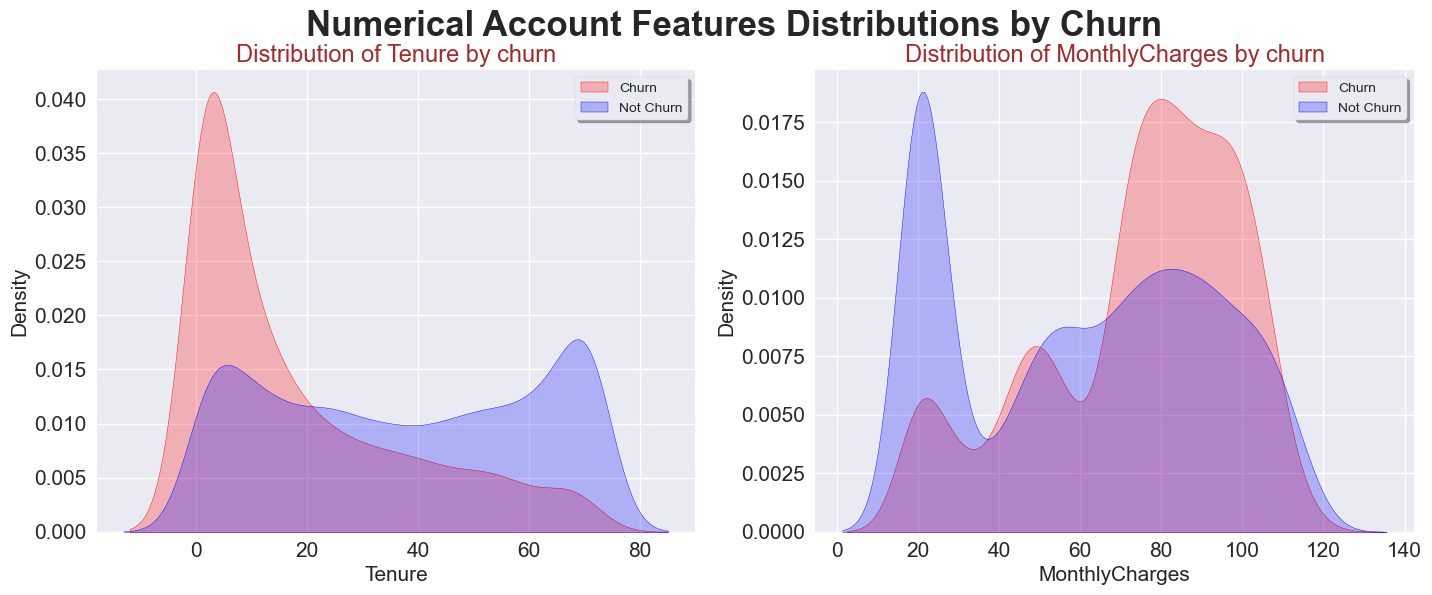

In [53]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (17,6))
fig.suptitle('Numerical Account Features Distributions by Churn', fontsize=25, weight='bold')
for i in range(2):
    kdeplot_churn(churn_df, Account_cols_num[i], ax=axes[i])

In [73]:
#Q6 จากกราฟทำให้เห็นได้ชัดว่าchurn rate จะเพิ่มขึ้น ณ ระดับที่ลูกค้่มีค่าบริการรายเดือนเพิ่มขึ้น ดังนั้น 
#'The churn rate increases as the customers pay higher monthly charges' เป็นความจริง
#เพิ่มเติม ถ้าเราดูจะพบว่าในกราฟ MonthlyCharges วิเคราะห์ที่ลูกค้าที่ย้ายค่ายจะเห็นว่ามี3กลุ่มลูกค้า แบ่งราคาที่จ่ายเป็น3ช่วง 0-40,40-60,80-140
#โดยอัตราการย้ายในกลุ่มราคาไม่สูงจะน้อยและเพิ่มขึ้นไปเรื่อยและถ้าดูดีๆจะมีจุดเชื่อมโรงกันนั้นคือปลายยอดยอดที่ค่าบริการ 20,50,80 คือจุดที่
#อัตราการย้ายค่ายที่สูงสุดในแต่ละช่วงราคา ซึ่งเป็นจุดที่ลูกค้าไม่ย้ายค่ายในอัตราที่สูงสุดในแต่ละช่วงเหมือนกัน แสดงให้เห็นว่า ที่ราคา20,50,80
#เป็นจุดcriticalหรือเซนซิทีพที่สุดของลูกค้า จุดที่ลูกค้าจะตัดสินใจย้ายค่ายไหม ดังนั้นถ้าเราดู ณ จุดที่ราคา20 ยังไม่มีปัญหาอะไรมากต้องให้การตลาดมา
#มาแก้ที่ราคา80ก่อน ทำยังก็ได้ให้ลูกค้าเปลี่ยนใจไม่ย้ายค่าย เช่น ให้ส่วนลดลูกค้าที่ราคานี้แต่ว่าต้องติดสัญญา1-2ปี เพราะถ้าดูกราฟTenure จะเห็นว่าที่3-5
#3-5เดือนโดยประมาณลูกค้ามีอัตราการย้ายค่ายที่สูงมากแต่เมื่อผ่าน20เดือนลูก้าจะมีอัตราการย้ายค่ายน้อยกว่าการอยู่ต่อ ดังนั้นเราจึงจะเสนอ
#โปรโมชั่นสวนลดแต่ติดสัญญาระยะยาวเพื่อจูงใจให้ลูกค้าไม่ย้ายค่ายตามข้อมูล
#From the graph, it is obvious that the churn rate will increase at the level where the customer's monthly service fee increases.
#'The churn rate increases as the customers pay higher monthly charges' is true.
#Further, if we look, we will find that in the graph MonthlyCharges Analyzing 
#customers who move camps will see that there are 3 groups of customers. 
#Divide the price paid into 3 ranges. 0-40,40-60,80-140 with the moving rate in the price group not high,
#less and increasing, and if you look carefully, there will be a connecting point that is at the top of the peak,
#where the service charge 20,50,80 is the point
#where the highest moving rate in each camp price range This is the point 
#where customers do not move camps at the same highest rate in each period. shows that for 20,50,80, 
#It is the most critical or sensitive point of the customer. The point where the customer will decide 
#to move the camp? Therefore, if we look at the point where the price is 20, there is still no problem, 
#we must let the market fix it at the price of 80 first. 
#You can still do it for customers to change their minds and not move to the camp, for example,
#giving discounts to customers at this price, but having to stick to a 1-2 year contract.
#Because if you look at the Tenure graph It can be seen that at approximately 3-5 months,
#the customer has a very high rate of moving camps, but after 20 months, Luca has a lower transfer rate than staying.
#Therefore, we will offer discounted promotions but stick to long-term contracts to incentivize customers 
#not to move based on information.

In [35]:
churn_df["Partner"] = churn_df["Partner"].map({'Yes':1, 'No':0})   

In [58]:
churn_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,FiberOptic,NoServ,NoStream,SumOfIntServices,MonthToMonth,ElectronicCheck
0,Female,0,1,No,1,0,0,1,29.85,29.85,No,0,1,0,1,1,1
1,Male,0,0,No,34,1,0,0,56.95,1889.5,No,0,1,0,2,0,0
2,Male,0,0,No,2,1,0,1,53.85,108.15,Yes,0,1,0,2,1,0
3,Male,0,0,No,45,0,0,0,42.30,1840.75,No,0,1,0,3,0,0
4,Female,0,0,No,2,1,0,1,70.70,151.65,Yes,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,Yes,24,1,1,1,84.80,1990.5,No,0,1,1,3,0,0
7039,Female,0,1,Yes,72,1,1,1,103.20,7362.9,No,1,1,1,2,0,0
7040,Female,0,1,Yes,11,0,0,1,29.60,346.45,No,0,1,0,1,1,1
7041,Male,1,1,No,4,1,1,1,74.40,306.6,Yes,1,0,0,0,1,0


In [59]:
churn_df_new = pd.read_csv('Data_Analyst_Interview_data_-_Telco .csv')

In [60]:
churn_df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [63]:
name={'customerID':'CustomerID', 'gender':'Gender', 'tenure':'Tenure'}

churn_df_new.rename(columns=name, inplace=True)

In [64]:
For_Q4 = ['OnlineBackup', 'OnlineSecurity', 'TechSupport','Churn']

In [67]:
def CountPlot(dataFrame, x, hue=None, ax=None):
   
    ax = sns.countplot(data=dataFrame, x=x, hue=hue, ax=ax)
    n_clients = dataFrame.shape[0]

    for p in ax.patches:

        loc    = p.get_x()
        height = p.get_height()
        width  = p.get_width()
        pct    = '({:0.2f}%)'.format(100*height/n_clients)

        ax.text(loc+width/2, height+3 , str(height), weight = 'bold',ha="center", fontsize=15)

        ax.text(loc+width/2, int(0.5*height), pct, weight = 'bold',ha="center", fontsize=15, color='w')

    ax.set_title(f"{x} Distribution", fontsize=25, color='brown')

    plt.draw()
    

    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel('Number of Users', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
        

    if hue:
        ax.legend(labels=list(dataFrame[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);

/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_883/1217300552.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_883/1217300552.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_883/1217300552.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);


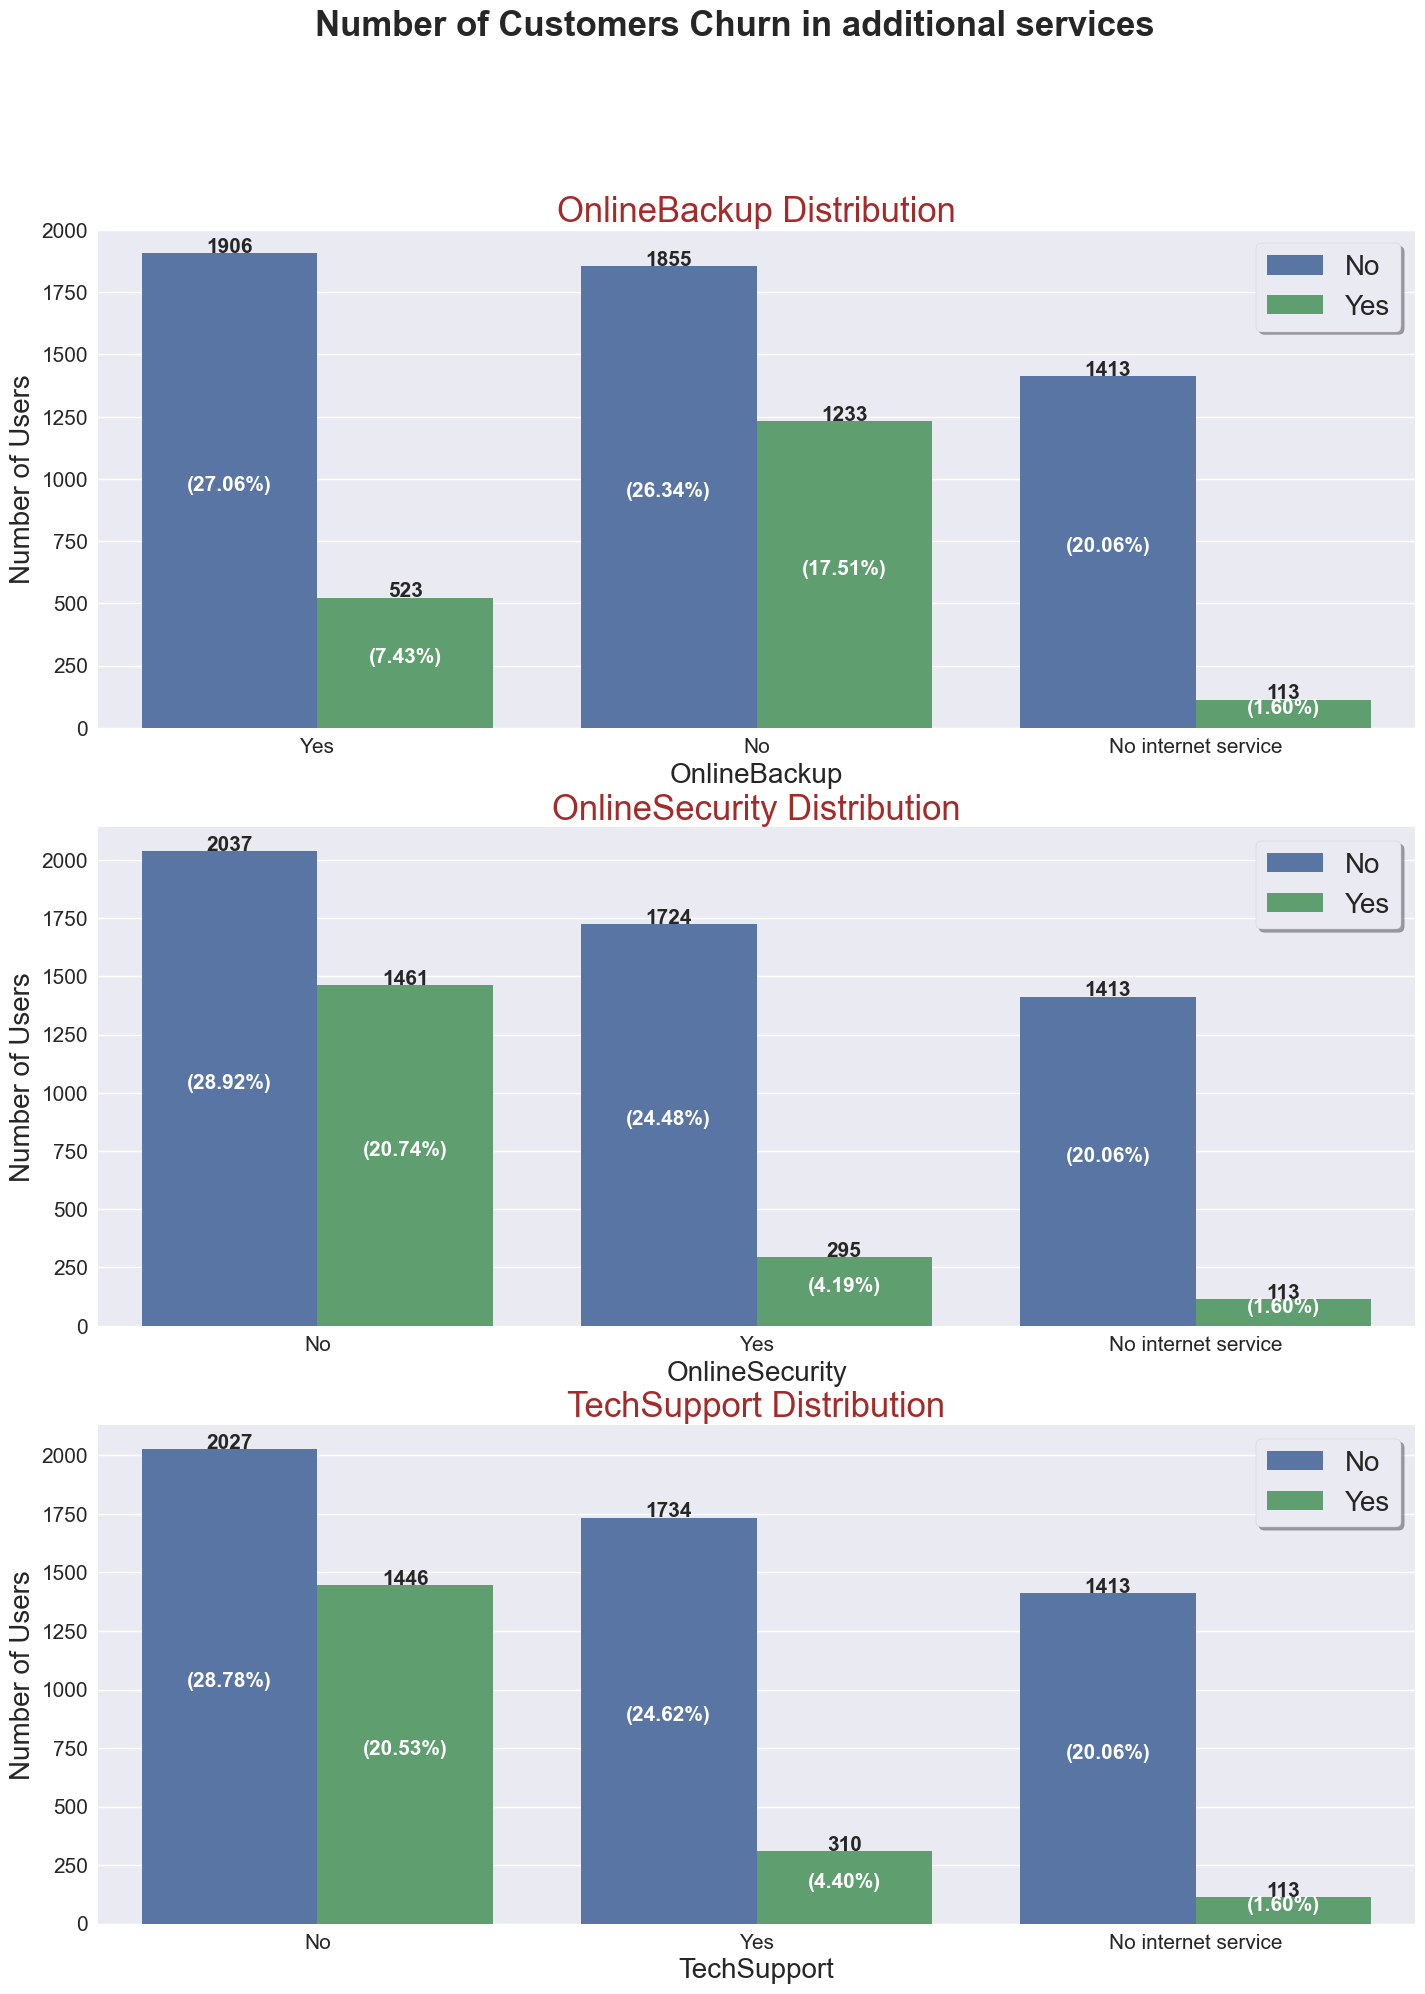

In [70]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (17,22))
fig.suptitle('Number of Customers Churn in additional services', fontsize=25, weight='bold')
for i, col in enumerate(For_Q4[:-1]):
    CountPlot(churn_df_new[For_Q4], col, hue="Churn", ax=axes[i])

In [71]:
#คิดว่ามีความสำคัญต่อลูกค้า เพราะว่าจากบาร์ทั้งสามรูป จะเห็นได้ชัดว่า ณ ที่บริการทั้งสามนั้น=No หรือไม่มีบริการ
#จะมีอัตราการเปลี่ยนค่ายหรือยกเลิกบริการสูงมากเมื่อเทียบกับการที่มีบริการโดย Onnine backup ถ้าไม่มีบริการลูกค้าที่ย้ายค่ายจะมีจำนวน1461คน
#ในขณะที่ถ้ามีบริการลูกค้าจะย้ายค่ายที่523คน ต่างกัน938คน รวมทั้ง OnlineSecurityและTechSupport ที่เมื่อไม่มีบริการลูกค้าจะมีอัตราการย้ายค่าย
#เพิ่มขึ้นเกือบจะเท่ากันที่16% โดยประมาณ